<a href="https://colab.research.google.com/github/abdullah345/Cats-and-Dogs-Classifier-with-fastAI/blob/master/cats_and_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cats And Dogs Classifier 
In this notebook i have worked up on Cats and Dogs Breeds Classification Oxford Dataset present on kaggle








In [17]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [6]:
import kaggle

In [0]:
!pip install -q kaggle

In [16]:
!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

 99% 767M/774M [00:13<00:00, 96.5MB/s]
100% 774M/774M [00:13<00:00, 61.5MB/s]


In [18]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"abdullah345","key":"d8382cdf915d117601eb56a5c4908a28"}'}

In [19]:
!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset -p /content/gdrive/My\ Drive/kaggle/CatsAndDogs


100% 771M/774M [00:05<00:00, 133MB/s]
100% 774M/774M [00:05<00:00, 152MB/s]


In [0]:

#os.chdir('gdrive/My Drive/kaggle/CatsAndDogs')
!unzip -q cats-and-dogs-breeds-classification-oxford-dataset.zip

In [0]:
import tarfile
if ('/content/gdrive/My Drive/kaggle/CatsAndDogs/images.tar.gz'.endswith("tar.gz")):
    tar = tarfile.open('/content/gdrive/My Drive/kaggle/CatsAndDogs/images.tar.gz', "r:gz")
    tar.extractall()
    tar.close()
elif ('/content/gdrive/My Drive/kaggle/CatsAndDogs/images.tar.gz'.endswith("tar")):
    tar = tarfile.open('/content/gdrive/My Drive/kaggle/CatsAndDogs/images.tar.gz', "r:")
    tar.extractall()
    tar.close()

In [0]:
dogs={'Sphynx'}
f = open("/content/gdrive/My Drive/kaggle/CatsAndDogs/annotations/list.txt", "r")
for x in f:
  if x[0].isupper():
    #print(x.split('_')[0])
    dogs.add(x.split('_')[0])
    


In [72]:
dogs

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British',
 'Egyptian',
 'Maine',
 'Persian',
 'Ragdoll',
 'Russian',
 'Siamese',
 'Sphynx'}

In [0]:
cats={'yorkshire'}
f = open("/content/gdrive/My Drive/kaggle/CatsAndDogs/annotations/list.txt", "r")
for x in f:
  if x[0].islower():
    #print(x.split('_')[0])
    cats.add(x.split('_')[0])

In [0]:
for name in dogs:
  path = Path(name)
  dest = path/name
  dest.mkdir(parents = True, exist_ok = True)

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
for name in cats:
  path = Path(name)
  dest = path/name
  dest.mkdir(parents = True, exist_ok = True)

In [0]:
from shutil import copyfile

In [0]:

for file in os.listdir('/content/gdrive/My Drive/kaggle/CatsAndDogs/images/'):
    filename1 = os.path.basename(file)
    filename = os.path.basename(file.split('_')[0])
    src_dir = "/content/gdrive/My Drive/kaggle/CatsAndDogs/images/"+filename1
    dst_dir = '/content/gdrive/My Drive/kaggle/CatsAndDogs/'+filename
    shutil.move(src_dir,dst_dir)

In [194]:
%cd /content/gdrive/My Drive/kaggle/CatsAndDogs

/content/gdrive/My Drive/kaggle/CatsAndDogs


In [191]:
%cd staffordshire

/content/gdrive/My Drive/kaggle/CatsAndDogs/staffordshire


In [0]:
#deleting corrupted images
classes = []
path=Path('/content/gdrive/My Drive/kaggle/CatsAndDogs')
for c in dogs:
  classes.append(c)
for c in cats:
    classes.append(c)
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

In [206]:
len(classes)

35

In [147]:
path.ls

<bound method <lambda> of PosixPath('/content/gdrive/My Drive/kaggle/CatsAndDogs')>

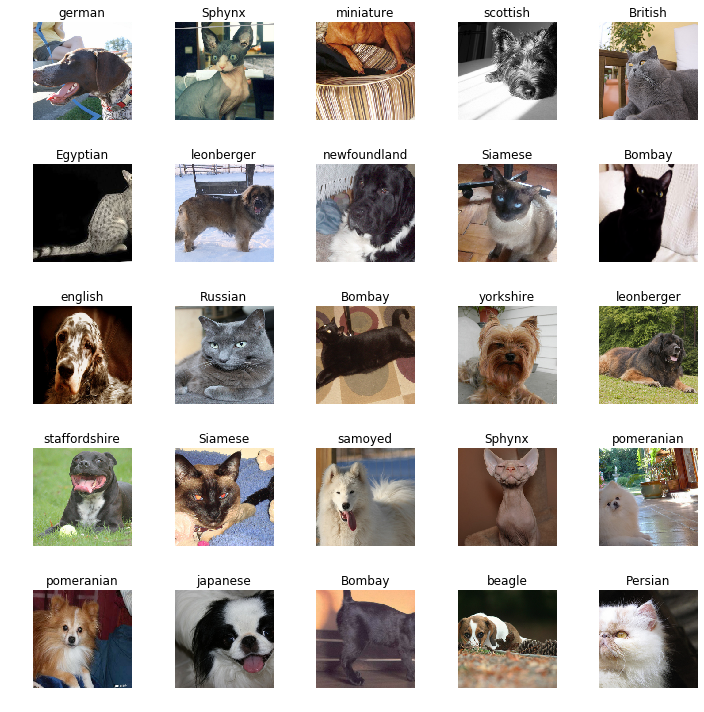

In [207]:
#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [208]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British', 'Egyptian', 'Maine', 'Persian', 'Ragdoll', 'Russian', 'Siamese', 'Sphynx', 'american', 'basset', 'beagle', 'boxer', 'chihuahua', 'english', 'german', 'great', 'havanese', 'japanese', 'keeshond', 'leonberger', 'miniature', 'newfoundland', 'pomeranian', 'pug', 'saint', 'samoyed', 'scottish', 'shiba', 'staffordshire', 'wheaten', 'yorkshire']
5912
1477


#Training

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [210]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,2.274953,0.790714,0.161137,01:51
1,0.834496,0.278704,0.083954,01:51
2,0.449323,0.239678,0.075152,01:50
3,0.351629,0.224878,0.074475,01:49
4,0.295533,0.230159,0.080569,01:47
5,0.244000,0.210472,0.069736,01:47
6,0.221538,0.212762,0.067028,01:47
7,0.184653,0.190907,0.067028,01:47
8,0.169670,0.190454,0.062965,01:48
9,0.130802,0.182238,0.058903,01:51


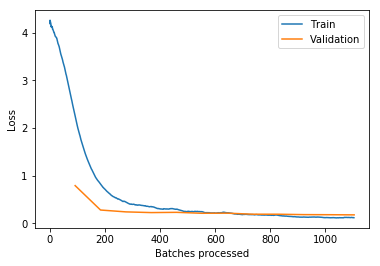

In [211]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


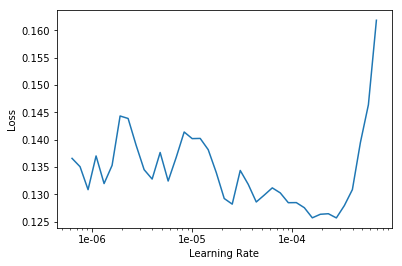

In [214]:
learn.lr_find()
learn.recorder.plot()

In [215]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.183632,0.359455,0.102234,01:51
1,0.185142,0.230160,0.069736,01:52
2,0.112562,0.214255,0.067705,01:53


This doesn't help much so we use the stage-1 training.

In [0]:
learn.save('stage-2')

#Interpretation

In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

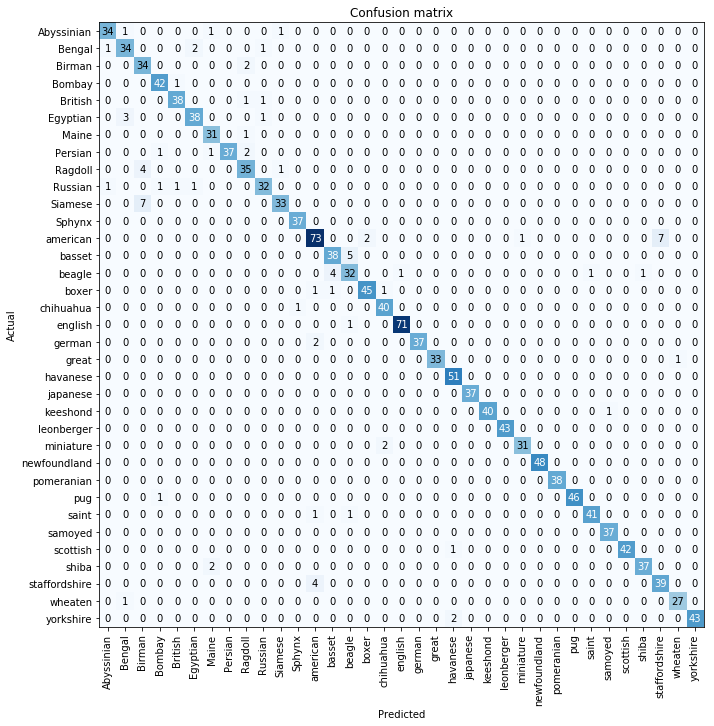

In [219]:
interp.plot_confusion_matrix(figsize=(15, 10))

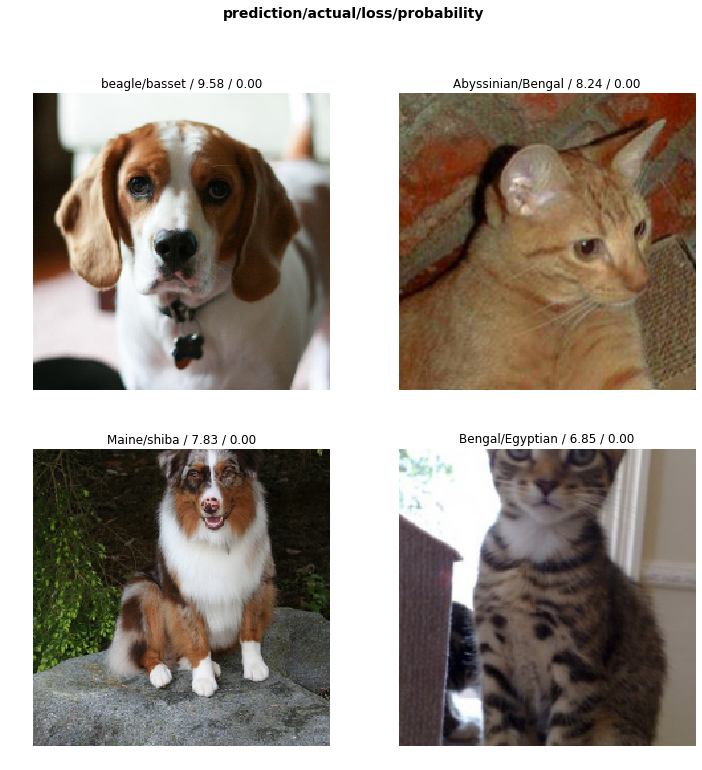

In [220]:
interp.plot_top_losses(k = 4, heatmap=False)

#Prediction

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn.export()

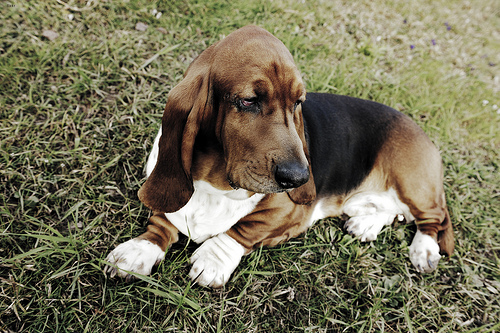

In [231]:
#example image
img = open_image(path/'basset/basset_hound_1.jpg')
img

In [0]:
learn = load_learner(path)

In [232]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  basset


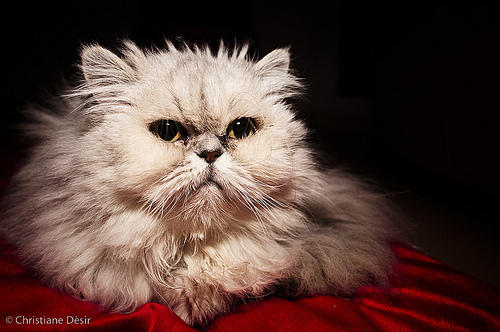

In [234]:
img = open_image(path/'Persian/Persian_104.jpg')
img

In [235]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  Persian


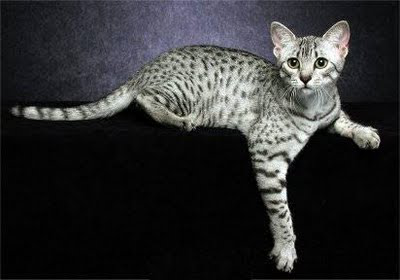

In [236]:
img = open_image(path/'Egyptian/Egyptian_Mau_106.jpg')
img

In [237]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  Egyptian
